<a href="https://colab.research.google.com/github/eadamsRU/GIS_RU/blob/main/GIS_Dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SCOPE**

* Food availbility
  * Food Deserts
    - [can mention how Camden is known as a food desert]
  * Healthy Grocery/ Food Stores
    - contrast with fast food locations
  * Farmers markets
    - usda would be a good resource
* Exercise
  * Obesity
    - obesity rates
    - diabetes populations
    - heart disease populations
      * Source: County Health Rankings & Roadmaps, CDC, or state health agencies.
  * Physically Inactive Persons
    - Local public gyms in counties
    * physical activity levels
* Diet
  * healthy food index
    - Nutritional intake surveys
*
*
*
*
*

# **CODE**

## Let's get the setup

In [17]:
%%capture
!pip install geopandas==1.0.1
!pip install mapclassify

In [18]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import geopandas as gpd #gis/maps: a sister of pandas; does the job;
#tho not as fancy-interactive as folium or leafmap https://geopandas.org/

import mapclassify #need for thematic map classification

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

#from google.colab import data_table
#data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )
from google.colab.data_table import DataTable
DataTable.max_columns = 250

In [19]:
#!python --version
gpd.__version__

'1.0.1'

## Shapefile(s)

In [20]:
#i found one and reposted on my website, download it onto colab:
! wget -q -O nj-counties.zip https://docs.google.com/uc?id=1xJDhcRCkgv7k4tNCa72Oog5bohV6dTB2&export=download

zip_ref = zipfile.ZipFile('nj-counties.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
njC0=gpd.read_file('nj_counties.shp') #load the shapefile with gpd as njC

In [21]:
njC0.dtypes #with geopandas can do stuff like with pandas :)
#njC0.info()

,0
COUNTY,object
COUNTY_LAB,object
CO,object
GNIS_NAME,object
GNIS,object
FIPSSTCO,object
FIPSCO,object
ACRES,float64
SQ_MILES,float64
POP2010,int64


## Getting our datasets

We store our dataframe as whatever variable.
Using pandas library we can read in either csv or xlsx file. (In this case I use pd.read_csv to read in a FORMATTED csv file that I upload to my github). When I say formatted, I mean it is all cleaned, no blank records, everything is transposed and columns and rows pandas will be able to be read easily.
* You can also use google drive but to keep it simple I'll do github (version control plus simpler)

In [22]:
dietExerciseIndex = pd.read_csv('https://github.com/eadamsRU/GIS_RU/raw/refs/heads/main/diet%20exercise%20formatted%2009262024%20-%202%20-%20Sheet1.csv')

In [23]:
dietExerciseIndex.dtypes

,0
County,object
Healthy Food,float64
Exercise Opportunities,float64
Obese Persons,float64
Physically Inactive Persons,float64
Children Eligible for Free Lunch,float64


This below code is good to elimiate any blank spaces that may still be there that the eye does not catch, good practice to include something like this.

In [24]:
dietExerciseIndex.columns = dietExerciseIndex.columns.str.strip()


Incredibly important step below to make sure that the variable that we found to join on our shapefile matches EXACTLY with our file. (CASE_sensitive)

In [25]:
dietExerciseIndex.rename(columns={'County': 'COUNTY'}, inplace=True)

I also found for my data do the same with all other columns you plan on using. This will come into play later

In [26]:
dietExerciseIndex.rename(columns={'Healthy Food': 'HEALTHY FOOD'}, inplace=True)


***VERY IMPORTANT***
THIS IS HOW YOU CONVERT DATATYPES

In [ ]:
# If you want to convert multiple columns
columns_to_convert = ['HEALTHY FOOD', 'Exercise Opportunities', 'OBESE PERSONS', 'PHYSICALLY INACTIVE PERSONS', 'CHILDREN ELIGIBLE FOR FREE LUNCH']  # replace with your actual column names
dietExerciseIndex[columns_to_convert] = dietExerciseIndex[columns_to_convert].astype('int64')

## Merge

In [28]:
njC2 = pd.merge(njC0, dietExerciseIndex, on='COUNTY',how='outer',indicator=True) #(make sure to have njC shapefile from previous sec)


Use this to check if merge was successful and we can read our DF

In [29]:
njC2.head(1)


,COUNTY,COUNTY_LAB,CO,GNIS_NAME,GNIS,FIPSSTCO,FIPSCO,ACRES,SQ_MILES,POP2010,...,REGION,Shape_Leng,Shape_Area,geometry,HEALTHY FOOD,Exercise Opportunities,Obese Persons,Physically Inactive Persons,Children Eligible for Free Lunch,_merge
0,ATLANTIC,Atlantic County,ATL,County of Atlantic,882270,34001,1,390815.404215,610.649069,274549.0,...,COASTAL,650228.153906,1.702385e+10,"POLYGON ((443056.01 311529.77, 443068.44 31152...",NaN,NaN,NaN,NaN,NaN,left_only


## Convert our Merged DF to int64 from float64

In [30]:
# Fill NaN values with a default value (e.g., 0)
njC2['HEALTHY FOOD'] = njC2['HEALTHY FOOD'].fillna(0)

# Now convert to int64
njC2['HEALTHY FOOD'] = njC2['HEALTHY FOOD'].astype('int64')

use print to check the columns, if we have any dupes then we will do a method I found that is convoluted but gets the job done.

* **Need to find a better method for this though**

In [31]:
print(njC2['HEALTHY FOOD'])


0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     7
22     0
23     5
24     4
25     8
26    11
27     0
28     6
29     0
30     2
31     3
32     3
33     4
34     3
35     8
36     1
37     8
38     3
39     5
40     0
41     7
Name: HEALTHY FOOD, dtype: int64


In [32]:
# Fill NaN values with a default value (e.g., 0)
njC2['HEALTHY FOOD'] = njC2['HEALTHY FOOD'].fillna(0)

# Now convert to int64
njC2['HEALTHY FOOD'] = njC2['HEALTHY FOOD'].astype('int64')

## THIS IS THE STEP, RUN JUST ONE TIME
* understand indices and this will help anyone, even if it is not just the top rows are all blank, say it is middle 5-10, you can still use this just change the ranges and will help you out.

In [37]:
#njC2['HEALTHY FOOD'] = njC2['HEALTHY FOOD'].iloc[21:].reset_index(drop=True)

Print to check you have data where you need.

In [34]:
print(njC2)

               COUNTY         COUNTY_LAB   CO             GNIS_NAME    GNIS  \
0            ATLANTIC    Atlantic County  ATL    County of Atlantic  882270   
1              BERGEN      Bergen County  BER      County of Bergen  882271   
2          BURLINGTON  Burlington County  BUR  County of Burlington  882272   
3              CAMDEN      Camden County  CAM      County of Camden  882273   
4            CAPE MAY    Cape May County  CAP    County of Cape May  882274   
5          CUMBERLAND  Cumberland County  CUM  County of Cumberland  882275   
6               ESSEX       Essex County  ESS       County of Essex  882276   
7          GLOUCESTER  Gloucester County  GLO  County of Gloucester  882277   
8              HUDSON      Hudson County  HUD      County of Hudson  882278   
9           HUNTERDON   Hunterdon County  HUN   County of Hunterdon  882228   
10             MERCER      Mercer County  MER      County of Mercer  882229   
11           MONMOUTH    Monmouth County  MON    Cou

In [35]:
njC2.columns = njC2.columns.str.strip()

# **MAPS**

## This is a basic map, good to use as a starting point

DEBUG (WORKS)

In [97]:
print(njC2[njC2.geometry.isnull()])


Empty GeoDataFrame
Columns: [COUNTY, COUNTY_LAB, CO, GNIS_NAME, GNIS, FIPSSTCO, FIPSCO, ACRES, SQ_MILES, POP2010, POP2000, POP1990, POP1980, POPDEN2010, POPDEN2000, POPDEN1990, POPDEN1980, REGION, Shape_Leng, Shape_Area, geometry, HEALTHY FOOD, Exercise Opportunities, Obese Persons, Physically Inactive Persons, Children Eligible for Free Lunch, _merge]
Index: []

[0 rows x 27 columns]


In [95]:
njC2 = njC2[~njC2.geometry.isnull()]

In [96]:
njC2 = njC2.to_crs(epsg=3857)  # Using Web Mercator (EPSG:3857) as an example


<Axes: >

,0
0,"Text(-8311174.075015094, 4790366.237242303, 'A..."
1,"Text(-8246337.247068637, 5006655.089576726, 'B..."
2,"Text(-8312044.444576543, 4848269.124234073, 'B..."
3,"Text(-8344506.89112397, 4837478.296176319, 'CA..."
4,"Text(-8326688.160923031, 4743044.344964853, 'C..."
5,"Text(-8361279.012639857, 4775359.647757998, 'C..."
6,"Text(-8265113.615734561, 4980977.958160284, 'E..."
7,"Text(-8364677.696652, 4824935.330250312, 'GLOU..."
8,"Text(-8246574.496996955, 4973815.024634254, 'H..."
9,"Text(-8339191.301984139, 4948759.2571001155, '..."


[]

[]

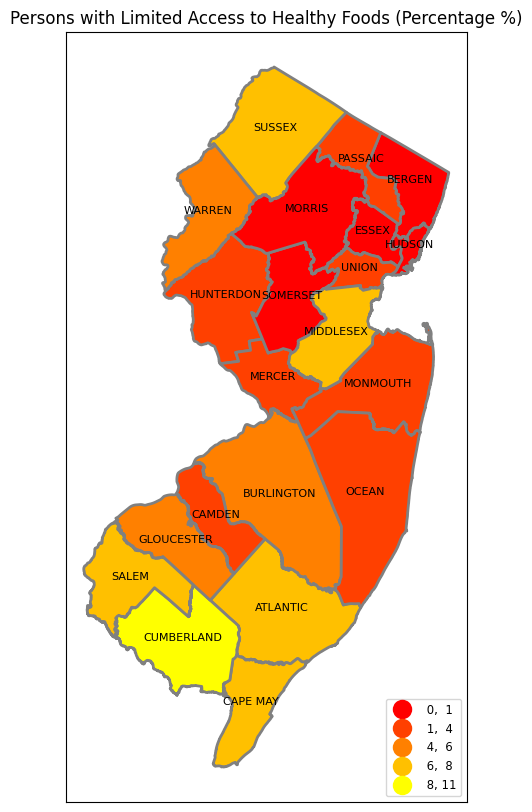

In [99]:
#first thematic map! lets unpack options esp fmt for dec pts; more later sec 'bells and whistles'
fig, ax = plt.subplots(1, figsize=(6,10))
njC2.plot(ax=ax,column='HEALTHY FOOD',legend=True,cmap='autumn',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #

# Add county names on the map
njC2.apply(lambda x: ax.text(x.geometry.centroid.x, x.geometry.centroid.y,
                             x['COUNTY'], fontsize=8, ha='center'), axis=1)

#leg1 = ax.get_legend()
#leg1.set_title('''Population Density
#2010 (pers/sq mi)''')
ax.title.set_text("Persons with Limited Access to Healthy Foods (Percentage %)")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks

#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as

## More Maps

# **ANALYSIS**

* this should be after the maps and just include some talking points about what we can really make of this data

* Can include things such as code snippets clusters of maps to drive these points through

# **ERRORS**

## DEBUG (WORKS)

### this was how I check for missing geometries on my files, this was necessary for me to add the county names in my map portion with this code snippet:
    
    # Add county names on the map
    njC2.apply(lambda x: ax.text(x.geometry.centroid.x, x.geometry.centroid.y,x['COUNTY'], fontsize=8, ha='center'), axis=1)


In [ ]:
print(njC2[njC2.geometry.isnull()])


Empty GeoDataFrame
Columns: [COUNTY, COUNTY_LAB, CO, GNIS_NAME, GNIS, FIPSSTCO, FIPSCO, ACRES, SQ_MILES, POP2010, POP2000, POP1990, POP1980, POPDEN2010, POPDEN2000, POPDEN1990, POPDEN1980, REGION, Shape_Leng, Shape_Area, geometry, HEALTHY FOOD, Exercise Opportunities, Obese Persons, Physically Inactive Persons, Children Eligible for Free Lunch, _merge]
Index: []

[0 rows x 27 columns]


In [ ]:
njC2 = njC2[~njC2.geometry.isnull()]

In [ ]:
njC2 = njC2.to_crs(epsg=3857)  # Using Web Mercator (EPSG:3857) as an example


Sometimes merging, atleast for this dataset, I still had to strip again columns. May have to do that everytime you are working with a 'new' dataframe, even if it is building upon an 'old' df.

# **FUTURE ENHANCEMENTS**

* color this to make it similiar to my plant wiki idea, see if colab can even do this
* make the maps pretty
* interactive maps? sliding scale to see year by year data and the changes that go in, see if there is any insights to be made

# **RESOURCES**

URLS for datasets:
*
*
*

Color themes(CASE_sensitive):
* cmap = ['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', 'BuGn_r', 'BuPu_r', 'CMRmap_r', 'GnBu_r', 'Greens_r', 'Greys_r', 'OrRd_r', 'Oranges_r', 'PRGn_r', 'PiYG_r', 'PuBu_r', 'PuBuGn_r', 'PuOr_r', 'PuRd_r', 'Purples_r', 'RdBu_r', 'RdGy_r', 'RdPu_r', 'RdYlBu_r', 'RdYlGn_r', 'Reds_r', 'Spectral_r', 'Wistia_r', 'YlGn_r', 'YlGnBu_r', 'YlOrBr_r', 'YlOrRd_r', 'afmhot_r', 'autumn_r', 'binary_r', 'bone_r', 'brg_r', 'bwr_r', 'cool_r', 'coolwarm_r', 'copper_r', 'cubehelix_r', 'flag_r', 'gist_earth_r', 'gist_gray_r', 'gist_heat_r', 'gist_ncar_r', 'gist_rainbow_r', 'gist_stern_r', 'gist_yarg_r', 'gnuplot_r', 'gnuplot2_r', 'gray_r', 'hot_r', 'hsv_r', 'jet_r', 'nipy_spectral_r', 'ocean_r', 'pink_r', 'prism_r', 'rainbow_r', 'seismic_r', 'spring_r', 'summer_r', 'terrain_r', 'winter_r', 'Accent_r', 'Dark2_r', 'Paired_r', 'Pastel1_r', 'Pastel2_r', 'Set1_r', 'Set2_r', 'Set3_r', 'tab10_r', 'tab20_r', 'tab20b_r', 'tab20c_r']

* My favorites (non color names seem to be better if using categorical data, colors are great for sliding scale data numbericals)(ones like ocean are great, 0 value is green and all others are blue, really helps drive how some disparirty there is in data): ['viridis','cividis','twilight','Blues','BuGn', 'Greys','binary','Wistia','autumn','bone','cool','copper','flag','gist_earth','gist_gray','gist_ncar','hsv','ocean','prism','rainbow','seismic','winter','Pastel1','Pastel2','']
* can i use additional libraries for color libraries?

In [15]:
print(plt.colormaps())


['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', 'BuGn_r', 'BuPu_r', 'CMRmap_r', 'GnBu_r', 'G